In [2]:
import sqlite3
import pandas as pd
import traceback


#takeaway_db = '../databases/takeaway.db'
takeaway_db = r"D:\BeCode\Excercise1\GNT-Arai-7\projects\07-delivery_market_analysis_with_SQL\databases\takeaway.db"
#deliveroo_db ='../databases/ubereats.db'

def query_db(db, sql_query):
    ''' 
    input: 
        db (str): Path to SQLite database
        sql_query (str): SQL query to execute
    output: 
        pandas DataFrame containing query results
    '''
    try:
        # Connect to the SQLite database
        conn = sqlite3.connect(db)
        print('Connection Successful')

        # Execute the SQL query and fetch the results
        df = pd.read_sql_query(sql_query, conn)

        # Close the connection
        conn.close()

        # Return the query results as a pandas DataFrame
        return df

    except Exception as e:
        print('An error occurred:', e)
        traceback.print_exc()
        return None
    

sql_query = "SELECT *  FROM locations;"

result_df = query_db(takeaway_db, sql_query)
if result_df is not None:
    print(result_df)


Connection Successful
        ID  postalCode   latitude  longitude               city  \
0        0        9400  50.792164   4.052104         Lieferinge   
1        1        9620  50.872532   3.832819        Grotenberge   
2        2        9500  50.775885   3.869852       Nederboelare   
3        3        9120  51.213449   4.257383            Beveren   
4        4        2845  51.109645   4.327743               Niel   
...    ...         ...        ...        ...                ...   
2500  2500        9680  50.816185   3.653858          Maarkedal   
2501  2501        9470  50.877341   4.065128        Denderleeuw   
2502  2502        1755  50.773008   4.063802           Oetingen   
2503  2503        8660  51.101270   2.591424           De Panne   
2504  2504        9400  50.818995   3.966288  Appelterre-Eichem   

                                         name  
0                       Onze-Lieve-Vrouwekerk  
1     Sint-Petrusbanden en Sint-Berlindiskerk  
2                          Si

Connection Successful
        city  availability_count
0       Gent                 607
1  Antwerpen                 586
2     Leuven                 289
3   Mechelen                 150
4     Brugge                 150
5   Oostende                 132
6    Hasselt                  98
7      Aalst                  96
8     Deurne                  93
9    Merksem                  78


C:\Users\kesav\AppData\Local\Temp\ipykernel_6616\1842586436.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_cities, x="city", y="availability_count", palette="viridis")


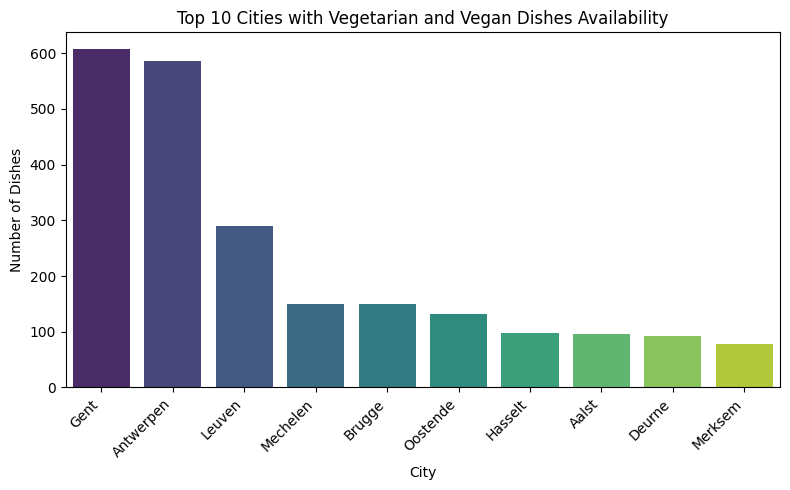

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


sql_query = """
SELECT 
    city, 
    COUNT(*) AS availability_count
FROM 
    restaurants
JOIN 
    menuitems ON menuitems.primaryslug = restaurants.primaryslug
WHERE 
    menuitems.name LIKE '%Vegen%' 
    OR menuitems.name LIKE '%Vegetarisch%' 
    OR menuitems.name LIKE '%Veggie%'
GROUP BY 
    restaurants.city
ORDER BY 
    availability_count DESC
LIMIT 10;
"""

# Fetch top 10 cities
top_10_cities = query_db(takeaway_db, sql_query)

if top_10_cities is not None and not top_10_cities.empty:
    # Display the data
    print(top_10_cities)

    # Bar chart
    plt.figure(figsize=(8, 5))
    sns.barplot(data=top_10_cities, x="city", y="availability_count", palette="viridis")
    plt.title("Top 10 Cities with Vegetarian and Vegan Dishes Availability")
    plt.xlabel("City")
    plt.ylabel("Number of Dishes")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("No data available.")

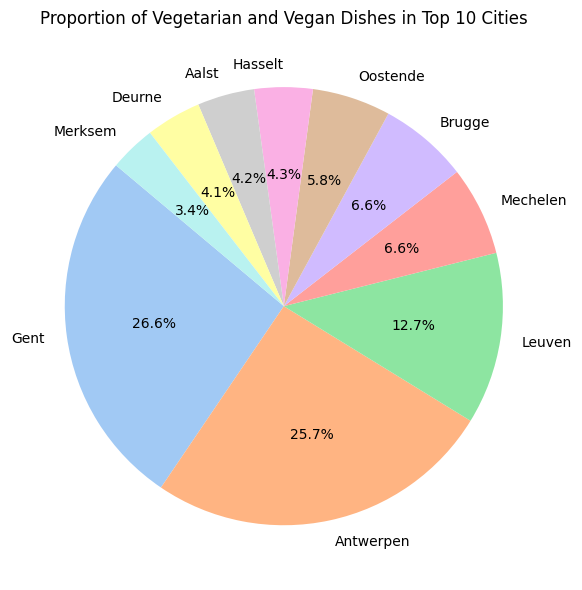

In [4]:
if top_10_cities is not None and not top_10_cities.empty:
    # Pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(
        top_10_cities["availability_count"],
        labels=top_10_cities["city"],
        autopct="%1.1f%%",
        startangle=140,
        colors=sns.color_palette("pastel")
    )
    plt.title("Proportion of Vegetarian and Vegan Dishes in Top 10 Cities")
    plt.tight_layout()
    plt.show()
else:
    print("No data available.")
